Importacion de las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


carga del archivo

In [12]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign (1).csv


ACTIVIDAD

• Identificación y descripción de las variables (categóricas y numéricas).

• Cálculo de medidas de tendencia central y dispersión.

• Análisis de distribución (incluyendo si hay sesgo o simetría).

• Visualizaciones gráficas como histogramas, boxplots, tablas de frecuencia, etc.

• Identificación de valores atípicos.

• Reflexiones o conclusiones preliminares sobre el comportamiento de los datos.

In [13]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [14]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


1. Identificación y descripción de variablescategóricas y numéricas

In [15]:
# 1. Identificación y descripción de variables (categóricas y numéricas)
print("Variables categóricas:")
print(data.select_dtypes(include='object').columns)

print("\nVariables numéricas:")
print(data.select_dtypes(include=np.number).columns)


Variables categóricas:
Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

Variables numéricas:
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


2. Cálculo de medidas de tendencia central y dispersión

In [16]:
print("\nMedidas de tendencia central y dispersión:")
print(data.describe())


Medidas de tendencia central y dispersión:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
mi

3. Análisis de distribución y visualizaciones gráficas

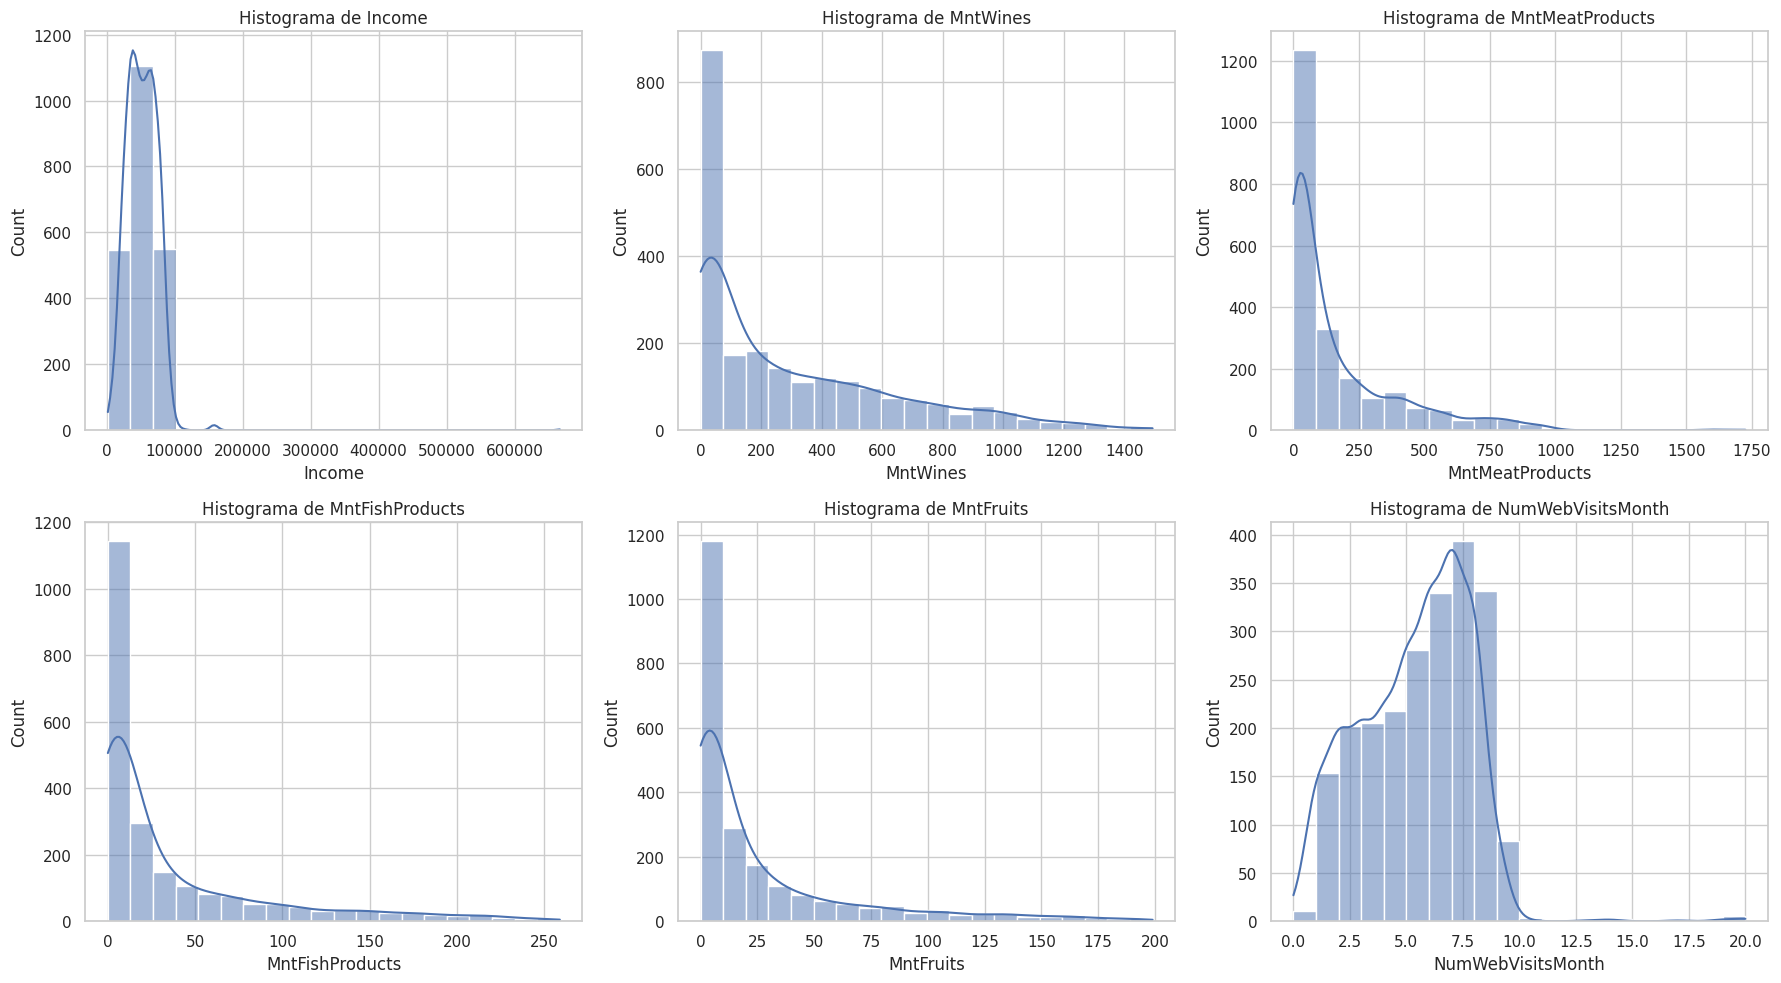

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, var in enumerate(variables_numericas):
    sns.histplot(data[var], bins=20, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Histograma de {var}')
plt.tight_layout()
plt.show()

4. Identificación de valores atípicos

In [21]:
print("\nValores atípicos detectados:")
for var in variables_numericas:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[var] < (Q1 - 1.5 * IQR)) | (data[var] > (Q3 + 1.5 * IQR))]
    print(f"\nValores atípicos en {var}:")
    print(outliers[[var]])


Valores atípicos detectados:

Valores atípicos en Income:
        Income
164   157243.0
617   162397.0
655   153924.0
687   160803.0
1300  157733.0
1653  157146.0
2132  156924.0
2233  666666.0

Valores atípicos en MntWines:
      MntWines
111       1332
161       1349
295       1241
424       1285
430       1248
466       1239
497       1396
515       1288
523       1379
543       1478
559       1492
824       1492
826       1279
870       1308
917       1478
937       1253
987       1394
990       1296
1001      1285
1010      1230
1052      1315
1191      1298
1458      1302
1488      1449
1492      1259
1577      1252
1641      1459
1749      1493
1922      1324
1953      1285
1961      1462
1992      1276
2067      1245
2098      1486
2127      1311

Valores atípicos en MntMeatProducts:
      MntMeatProducts
21               1725
29                801
51                780
76                925
77                779
...               ...
2190              655
2193              845

5.Reflexiones o conclusiones preliminares sobre el comportamiento de los datos